<a href="https://colab.research.google.com/github/ViRoTex/Exercises-Statistics-R-and-Python/blob/main/10_Regresi%C3%B3n_lineal_en_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regresión lineal de la Diabetes en Python

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
diabetes = datasets.load_diabetes()

In [ ]:
type(diabetes) # es un bunch, es decir, un aglomerado o empaquetamiento de datos de sklearn, hay que traducirlo 

sklearn.utils.Bunch

In [ ]:
type(diabetes.data)

numpy.ndarray

In [ ]:
diabetes.data.shape 

(442, 10)

In [ ]:
# vamos a quedarnos con todas las filas de la segunda columna
# ya que hasta ahora sólo hemos visto regresiones lineares simples, donde a partir de una x podemos predecir una y
# nos da un array unidimensional con todas las x
x = diabetes.data[:, np.newaxis, 2]
x

In [ ]:
# para los valores de las "y"
y = diabetes.target

In [ ]:
# ahora que tenemos todos los datos podemos hacer la regresión
mod = linear_model.LinearRegression()

In [ ]:
mod.fit(x, y) # ajuste de datos

LinearRegression()

In [ ]:
mod.coef_ # coeficiente para las x

array([949.43526038])

In [ ]:
mod.intercept_ # ordenada en el origen, "b"

152.1334841628967

$$\tilde{y} = 949.43526038\cdot x + 152.13348416289594 $$

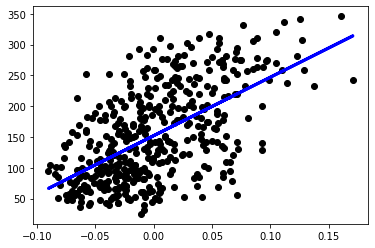

In [ ]:
# para mostrar la regresión junto a los puntos
plt.scatter(x, y, color = 'black')
plt.plot(x, mod.predict(x), color = 'blue', linewidth = 3)
plt.show()

$$MSE = \frac{\sum_{i = 1}^n(y_i - \tilde{y_i})^2}{n}$$

In [ ]:
mean_squared_error(y, mod.predict(x)) # es un error cuadrado medio muy alto

3890.4565854612724

In [ ]:
r2_score(y, mod.predict(x)) # r2 es muy bajo, por tanto, no es significativo, es un modelo no viable

0.3439237602253803

# Entrenamiento y validación de un modelo lineal

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
diabetes = datasets.load_diabetes()

In [5]:
type(diabetes)

sklearn.utils.Bunch

In [6]:
type(diabetes.data)

numpy.ndarray

In [7]:
diabetes.data.shape 

(442, 10)

In [8]:
x = diabetes.data[:, np.newaxis, 2]
x

array([[ 0.06169621],
       [-0.05147406],
       [ 0.04445121],
       [-0.01159501],
       [-0.03638469],
       [-0.04069594],
       [-0.04716281],
       [-0.00189471],
       [ 0.06169621],
       [ 0.03906215],
       [-0.08380842],
       [ 0.01750591],
       [-0.02884001],
       [-0.00189471],
       [-0.02560657],
       [-0.01806189],
       [ 0.04229559],
       [ 0.01211685],
       [-0.0105172 ],
       [-0.01806189],
       [-0.05686312],
       [-0.02237314],
       [-0.00405033],
       [ 0.06061839],
       [ 0.03582872],
       [-0.01267283],
       [-0.07734155],
       [ 0.05954058],
       [-0.02129532],
       [-0.00620595],
       [ 0.04445121],
       [-0.06548562],
       [ 0.12528712],
       [-0.05039625],
       [-0.06332999],
       [-0.03099563],
       [ 0.02289497],
       [ 0.01103904],
       [ 0.07139652],
       [ 0.01427248],
       [-0.00836158],
       [-0.06764124],
       [-0.0105172 ],
       [-0.02345095],
       [ 0.06816308],
       [-0

In [9]:
# para los valores de las "y"
y = diabetes.target

### esta es la parte que cambia, dónde dividimos los datos de x e y, una parte para entrenar y otra para testear, normalmente 20%:80% respectivamente, o bien, 25%:75%


In [10]:
x_train = x[:-60] # para entrenar vamos a coger las últimas 60 filas, más o menos un 20%
x_test = x[-60:] # para testear el resto
y_train = y[:-60]
y_test = y[-60:]

In [11]:
# ahora que tenemos todos los datos podemos hacer la regresión
mod = linear_model.LinearRegression()

In [12]:
mod.fit(x_train, y_train)

LinearRegression()

In [13]:
mod.coef_

array([940.05574082])

In [14]:
mod.intercept_

152.80161883617347

$$\tilde{y} = 940.05574082\cdot x + 152.80161883617347 $$

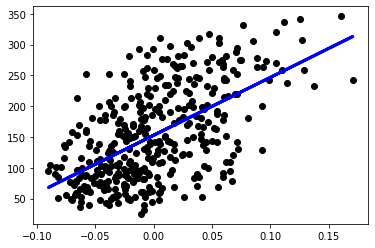

In [16]:
# para mostrar la regresión junto a los puntos
plt.scatter(x_train, y_train, color = 'black')
plt.plot(x, mod.predict(x), color = 'blue', linewidth = 3)
plt.show() # sale la línea un poco más inclinada, inapreciable

$$MSE = \frac{\sum_{i = 1}^n(y_i - \tilde{y_i})^2}{n}$$

In [17]:
mean_squared_error(y_train, mod.predict(x_train)) # da un valor ligeramente más alto

3954.0083497655905

In [19]:
r2_score(y_train, mod.predict(x_train)) # da un valor ligeramente más bajo

0.3331463299382713

## Testing
### Ahora comenzaría la fase de testing, dónde se toma el conjunto de datos de test para ajustarlo en el modelo creado con los datos de entrenamiento y ver cómo le quedan los datos

In [20]:
y_pred = mod.predict(x_test)

In [22]:
mean_squared_error(y_test, y_pred) # da un valor inferior al que daban los datos del modelo, por tanto, no existe overfitting

3490.5984515464324

In [23]:
r2_score(y_test, y_pred)

0.4103896998623372

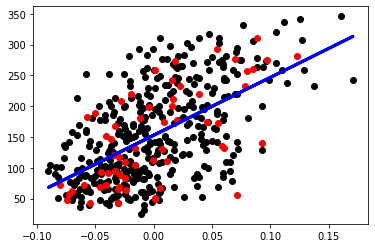

In [26]:
# vamos a ver los datos de entrenamiento con respecto con el modelo de validación
plt.scatter(x_train, y_train, color ='black')
plt.scatter(x_test, y_test, color = 'red')
plt.plot(x_train, mod.predict(x_train), color='blue', linewidth = 3)
plt.show()